# Amphi 2 - Kernel Methods and Applications

## Idea

The idea of kernel method is to define a comparison function from some set $\mathcal X \times\mathcal X \to \mathbf R$ and represent a set of data points by the $n \times n$ matrix

$$
[\mathbf K]_{ij} = K(\mathbf x_i, \mathbf x_j)
$$

then by using $K$, we don't need $\mathcal X$ to be a set of vectors, it can be string, images, etc

# 1. Kernels and RKHS
## 1.1 Positive Definite Kernels

**Definition 1.1 - Positive Definite Kernels**

*A **positive definite (p.d.) kernel** on a set $\mathcal X$ is a function $K: \mathcal X \times\mathcal X \to \mathbf R$ that is symmetric and satisfying *

$$\forall N \in \mathbf N, \forall (\mathbf x_1, \ldots, \mathbf x_N) \in \mathcal X^N, \forall (a_1, \ldots, a_N) \in \mathbf R^N:\\ \sum_{i=1}^N\sum_{j=1}^N a_i a_j K(\mathbf x_i, \mathbf x_j)\geq 0$$

*Equivalently, a p.d kernel is a function $K$ such that for any $N \in \mathbf N$, $(\mathbf x_1, \ldots, \mathbf x_N)\in \mathcal X^N$, the **similarity matrix** (or **Gram matrix**)*
$$
[\mathbf K]_{ij} = K(\mathbf x_i, \mathbf x_j)
$$
*is positive semidefinite*.

**Convention**

***Kernel methods** are algorithms taking such matrices as input.*

## 1.2 Simplest Kernels

**Lemma 1.2 - Dot-product kernels**

*Let $\mathcal X = \mathbf R^d$. The function $K: \mathcal X \times \mathcal X\to \mathbf R$ defined by *
$$
K(\mathbf x, \mathbf x') = \mathbf x \cdot \mathbf x'
$$
*is p.d.*

**Proof** (Linear Algebra)

**Lemma 1.3 - Dot-product preceded by a mapping**

*Let $\mathcal X$ be any set, $\Phi: \mathcal X \to \mathbf R^d$, then the function $K: \mathcal X\times \mathcal X \to \mathbf R$ defined by*
$$
K(\mathbf x, \mathbf x') = \langle \Phi(\mathbf x), \Phi(\mathbf x')\rangle_{\mathbf R^d}
$$
*is a p.d kernel.*

**Proof**

Symmetry is obvious. 
$$\sum_{i=1}^N \sum_{j=1}^N a_i a_j \langle \Phi(\mathbf x_i), \Phi(\mathbf x_j) \rangle_{\mathbf R^d} = \Vert \sum_{i=1}^N a_i \Phi(x_i)\Vert^2_{\mathbf R^d} \geq 0$$

**Example - Polynomial kernels**

We know that $K(\mathbf x, \mathbf x') = \mathbf x\cdot \mathbf x'$ ($\mathbf R^2 \times \mathbf R^2 \to \mathbf R$) is a kernel. Is $L = K^2$ a kernel? Suppose $\mathbf x = (x_1, x_2)$, $\mathbf x' = (x'_1, x'_2)$, we have
$$
L(\mathbf x, \mathbf x') = (x_1 x'_1 + x_2 x'_2)^2 = (x_1)^2 (x'_1)^2 + (x_2)^2 (x'_2)^2 + 2 x_1 x_2 x'_1 x'_2
$$
Choose $\Phi(\mathbf x) = (x_1^2, x_2^2, \sqrt2 x_1 x_2)$ ($\mathbf R^2 \to \mathbf R^3$), we have $L(\mathbf x, \mathbf x') = \langle \Phi(\mathbf x), \Phi(\mathbf x')\rangle_{\mathbf R^3} $. By lemma 1.3, $L$ is a kernel.

<img src="Kernel1.png" width=400></img>

## 1.3 Kernels are Inner Products

**Theorem 1.4 (Aronszajn, 1950) - Kernels are Inner Products**

*Let $X$ be any set. $K: \mathcal X \times \mathcal X \to \mathbf R$ is a p.d kernel on $\mathcal X$ iff there exists a Hilbert space $\mathcal H$ and a mapping $\Phi: \mathcal X \to \mathcal H$ s.t. for any $\mathbf x, \mathbf x' \in \mathcal X$*

$$
K(\mathbf x, \mathbf x') = \langle \Phi(\mathbf x), \Phi(\mathbf x')\rangle_{\mathcal H}
$$

**Proof** (Aronszajn (1944, 1950)

## 1.4 Reproducting Kernel Hilbert Space (RKHS)

**Definition 1.5 - RKHS**

*Let $\mathcal X$ be a set and $\mathcal H \subset \mathbf R^\mathcal X$ be a class of functions forming a (real) Hilbert space with inner product $\langle \cdot, \cdot\rangle_\mathcal H$. The function $K: \mathcal X^2 \to \mathbf R$ is called a reproducing kernel of $H$ if*

- *$\mathcal H$ contains all functions of the form $K_x = K(x, \cdot)$.*
- *For every $\mathbf x \in \mathcal X$ and $f \in \mathcal H$, the **reproducing property** holds:*
$$
f(\mathbf x) = \langle f, K_x\rangle_{\mathbf H}
$$

*If a r.k. $K$ exists then $\mathcal H$ is called the **reproducing kernel Hilbert space** (RKHS) of $K$.*

**Theorem 1.6 - An equivalent definition of RKHS**

*The Hilbert space $\mathcal H \subset \mathbf R^\mathcal X$ is a RKHS iff for any $\mathbf x \in \mathcal X$, the mapping*
$$
\mathbf F: \mathcal H \to \mathbf R\\
f \mapsto f(\mathbf x)
$$

*is continuous.*

**Proof** (TODO)

**Corollary 1.7 - Convergence in RKHS implies pointwise convergence**

*Let $(f_n)_{n \in \mathbf N}$ be a sequence of elements of $\mathcal H$ that converges to $f\in \mathcal H$, then $(f_n(\mathbf x))_{n \in \mathbf N}$ converges to $(f(\mathbf x))$ in $\mathbf R$ for any $\mathbf x \in \mathcal X$.*

**Theorem 1.8 - Uniqueness of RKHS and r.k.**

- *If $\mathcal H$ is a RKHS, then it has a unique r.k.*
- *A function $K$ in $\mathcal H$ can be the r.k. of at most one RKHS.*

(So we can talk about the kernel of a RKHS, or the RKHS of a kernel)

** Proof (TODO)**


**Theorem 1.9**

*A function $K: \mathcal X \times \mathcal X \to \mathbf R$ is positive definite iff it is a r.k. of some RKHS $\mathcal H \subset \mathbf R^\mathcal X$.*

## 1.5 Proof of Aronzsajn's Theorem

**Proof**

## 1.6 RKHS of Some Kernels

**Theorem 1.10 - RKHS of Linear Kernel**

*Let $\mathcal X = \mathbf R^d$ and the linear kernel $K(\mathbf x, \mathbf y) = \langle \mathbf x, \mathbf y \rangle_{\mathbf R^d}$. The RKHS of the linear kernel is the set of linear functions of the form:*

$$
f_{\mathbf w}(\mathbf x) = \langle \mathbf w, \mathbf x \rangle : \mathbf w \in \mathbf R^d
$$

*endowed with the inner product*

$$
\langle \mathbf w, \mathbf v \rangle_{\mathcal H} = \langle \mathbf w, \mathbf v \rangle_{\mathbf R^d}
$$

*so that the corresponding norm is*
$$
\Vert f_\mathbf w\Vert_{\mathcal H} = \Vert \mathbf w \Vert_{\mathbf R^d}
$$

**Example 1.11 - RKHS of Polynomial Kernel**

*Let $\mathcal X = \mathbf R^d$ and the quadratic polynomial kernel $K(\mathbf x, \mathbf y)=\langle x, y\rangle_{\mathbf R^d}^2$. The RKHS of $K$ is the set of quadratic functions*

$$
f_{\mathbf S}(\mathbf x) = \langle \mathbf S, \mathbf x\mathbf x^T \rangle_{F} = \mathbf x^T \mathbf S \mathbf x: \mathbf S \in \mathcal S^{d\times d} 
$$

*where $\mathcal S$ is the set of symmetric matrices in $\mathbf R^{d\times d}$, endowed with the inner-product $\langle f_{\mathbf S_1}, f_{\mathbf S_2}\rangle_{\mathcal H} = \langle\mathbf S_1, \mathbf S_2\rangle_F.$ and $\Vert \cdot \Vert_F$ is the Frobenius norm of matrices in $\mathbf R^{d\times d}$*

$$
\Vert [M]_{ij} \Vert_F^2 = \sum_{i=1}^d\sum_{j=1}^d |M_{ij}|^2
$$

**Theorem 1.12 - Operations on Kernels**

1. *If $K_1, K_2$ are p.d. kernels, then*
$$
K_1 + K_2, \\
K_1K_2, \\
cK_1 (c \geq 0)
$$

 *are also p.d. kernels.*
 
2. *If $(K_i)_{i \geq 1}$ is a sequence of p.d. kernels that converges pointwisely to a function $K$, i.e.*
$$
\forall (\mathbf x, \mathbf y) \in \mathcal X^2, K(\mathbf x, x') = \lim_{n \to +\infty} K_i(\mathbf x, \mathbf x')
$$
 *then K is also a p.d. kernel.*
 
3. *If $K$ is a p.d. kernel, then $\exp(K)$ is also a p.d. kernel.*

## 1.7 Remarks about Smoothness

By B.C.S, we have
$$
\forall f \in \mathcal H, \forall \mathbf x, \mathbf x' \in \mathcal X: 
$$
$$
|f(x) - f'(x)| = |\langle f, K_{\mathbf x} - K_{\mathbf x'}\rangle_{\mathcal H}| \leq \Vert f \Vert_{\mathcal H} \Vert K_{\mathbf x} - K_{\mathbf x'}\Vert_{\mathcal H} =: \Vert f \Vert_{\mathcal H} d_K(\mathbf x, \mathbf x')
$$

So the norm of a function in the RKHS controls the variation over $\mathcal X$ of $f$ w.r.t the geometry defined by the kernel.
A small norm gives a slow variation.

# 2. The Kernel Trick

## 2.1 Idea

*Any algorithm to process finite-dimensional vectors that can be expressed only in term of pairwise inner products can be applied to potentially infinite-dimensional vectors in the feature space of a p.d. kernel by rplacing each inner product evaluation by a kernel evaluation.*

## 2.2 Applications

**Example 2.1 - Compute Distances in the Feature Space**

We can define:
$$
d_K(\mathbf x_1, \mathbf x_2) = \Vert \Phi(\mathbf x_1) - \Phi(\mathbf x_2) \Vert_{\mathcal H}^2
$$

donc:
$$
d_K(\mathbf x_1, \mathbf x_2)^2 = K(\mathbf x_1, \mathbf x_1) + K(\mathbf x_2, \mathbf x_2) - 2K(\mathbf x_1, \mathbf x_2)
$$

$d_K(\mathbf x_1, \mathbf x_2)$ can be seen of the distance between $\mathbf x_1, \mathbf x_2$.

Illustration for distance in feature space with Gaussian Kernel between image of $z$ and $0$.

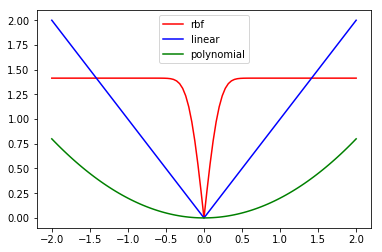

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def K(x, y, kernel = "rbf", degree = 2, gamma = 0.2, r = 0):
    if kernel == "rbf":
        return np.exp(-(x-y)**2/gamma**2)
    if kernel == "linear":
        return x * y
    if kernel == "polynomial":
        return (r + gamma * x * y)**degree
    return

def distanceTo0(z, kernel = "rbf", degree = 2, gamma = 0.2, r = 0):
    return np.sqrt(K(0, 0, kernel, degree, gamma, r) + K(z, z, kernel, degree, gamma, r) - 2*K(z, 0, kernel, degree, gamma, r))
    

interval = np.linspace(-2, 2, 101)
plt.plot(interval, distanceTo0(interval, kernel = "rbf"), 'r', label = 'rbf')
plt.plot(interval, distanceTo0(interval, kernel = "linear"), 'b', label = 'linear')
plt.plot(interval, distanceTo0(interval, kernel = "polynomial"), 'g', label = 'polynomial')
plt.legend()

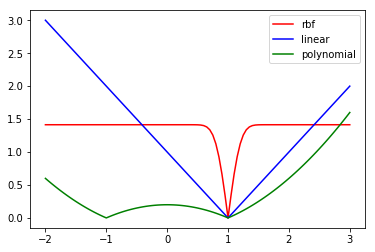

In [28]:
def distanceTo1(z, kernel = "rbf", degree = 2, gamma = 0.2, r = 0):
    return np.sqrt(K(1, 1, kernel, degree, gamma, r) + K(z, z, kernel, degree, gamma, r) - 2*K(z, 1, kernel, degree, gamma, r))

interval = np.linspace(-2, 3, 101)
plt.plot(interval, distanceTo1(interval, kernel = "rbf"), 'r', label = 'rbf')
plt.plot(interval, distanceTo1(interval, kernel = "linear"), 'b', label = 'linear')
plt.plot(interval, distanceTo1(interval, kernel = "polynomial"), 'g', label = 'polynomial')
plt.legend()

**Example 2.2 - Distance Between a Point and a Set**

The problem: Let $\mathcal S = \{\mathbf x_1, \ldots, x_N \}$ be a finite subset of $\mathcal X$. Give an idea of how to define the similarity/dissimilarity (or the distance) between any point $\mathbf x \in \mathcal X$ and the set $\mathcal S$.

**Idea:** Map all points to a feature space, define the center in the feature space, called **barycenter**
$$
\mu = \frac1n \sum_{n=1}^N \Phi(\mathbf x_n)
$$
Then define the distance between $\mathbf x$ and $\mathcal S$ by the distance of $\Phi(\mathbf x)$ and $\mu$ in the feature space:
$$
d_K(\mathbf x, \mathcal S) = \lVert \Phi(x) - \frac1n \sum_{n=1}^N \Phi(\mathbf x_n) \rVert_{\mathcal H} =\sqrt{K(\mathbf x, \mathbf x)- \frac2n \sum_{n=1}^N K(\mathbf x, \mathbf x_n) + \frac1{n^2}\sum_{n}\sum_m K(\mathbf x_n , \mathbf x_m) }
$$

Note that the barycenter $\mu$ only exists in the feature space in general and does not necessarily have a pre-image in $\mathcal X$.

<img src="Kernel2.png"></img>

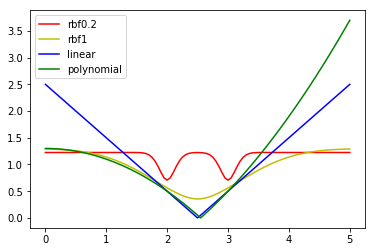

In [35]:
S = [2, 3]
sigma = 0.5

def distanceToSet(x, S, kernel = "rbf", degree = 2, gamma = 0.2, r = 0):
    A = K(x, x, kernel, degree, gamma, r)
    B = -2 / len(S) * sum([K(x, y, kernel, degree, gamma, r) for y in S])
    C = 1 / len(S) ** 2 * sum([sum([K(y, z, kernel, degree, gamma, r) for z in S]) for y in S])
    return np.sqrt(A + B + C)

interval = np.linspace(0, 5, 101)
plt.plot(interval, distanceToSet(interval, S, kernel = "rbf"), 'r', label = 'rbf0.2')
plt.plot(interval, distanceToSet(interval, S, kernel = "rbf", gamma = 1), 'y', label = 'rbf1')
plt.plot(interval, distanceToSet(interval, S, kernel = "linear"), 'b', label = 'linear')
plt.plot(interval, distanceToSet(interval, S, kernel = "polynomial"), 'g', label = 'polynomial')
plt.legend()

**In 2D - For classification**
<img src="Kernel3.png" width = 800></img>

**Example 2.3 - Centering data in the feature space**

**Problem** - Let $S = \{\mathbf x_1, \ldots, \mathbf x_N\}$ be a finite subset of $\mathcal X$ endowed with a kernel $K$, $[\mathbf K]$ is the $N \times N$ Gram matrix for $\mathcal S$, $\mu$ is the barycenter and $\mu_i = \Phi(\mathbf x_i)-\mu$ be the centered data in the feature space $\mathcal H$. How to compute the **centered Gram matrix** $\mathbf K^c = [\langle \mu_i, \mu_j\rangle_\mathcal H$]?

$$
\mathbf K_{i,j}^C = \mathbf K_{i,j} - \frac1n \sum_{k=1}^N (\mathbf K_{i,k} + \mathbf K_{j,k}) + \frac1{n^2}\sum_k\sum_l \mathbf K_{k,l}
$$

This can be written in matricial form
$$
\mathbf K^c = (\mathbf I - \mathbf U)\mathbf K(\mathbf I-\mathbf U)
$$

where $\mathbf I$ is the $N \times N$ identity matrix, $\mathbf U_{i,j} = 1/n$ for all $i, j$.

# 3 The Representer Theorem

**Theorem 3.1 - The Representer Theorem**

*Let $\mathcal X$ be a set endowed with a p.d. kernel $K$ and $\mathcal H$ be the corresponding RKHS, $\mathcal S = \{\mathbf x_1, \ldots, \mathbf x_N\}$ a finite subset of $\mathbf X$.*

*Let $\Psi: \mathbf R^{N+1} \to \mathbf R$ be a function on $N+1$ variables and strictly increasing w.r.t. the last variable.*

*Then, any solution of the minimization problem*

$$
\min_{f \in \mathcal H} \Psi(f(\mathbf x_1), \ldots, f(\mathbf x_N), \Vert f \Vert_{\mathcal H})
$$

*admits a representation of the form*
$$
f = \sum_{n=1}^N \alpha_n K(\mathbf x_n, \cdot) = \sum_{n=1}^N \alpha_n K_{\mathbf x_n}
$$ 

*In other words, the solution of the minimization problem lives in the finite-dimensional subspace*
$$
\mathrm{Span}(K_{\mathbf x_1}, \ldots, K_{\mathbf x_N}) 
$$

**Remarks**
- The minimization will enforce the norm to be small, so has regularization effect.
- Practically, the solution lies in a subspace of finite-dimenssion, lead to efficient algorithm.

When the representer theorem holds, we can look for a solution of the form
$$
f(\mathbf x) = \sum_{n=1}^N \alpha_i K(\mathbf x_i, \mathbf x)
$$
for some $\mathbf \alpha \in \mathbf R^N$

We have
$$
f(\mathbf x_n) = \sum_{m=1}^N \alpha_m K(\mathbf x_m, \mathbf x_n) = [\mathbf K \mathbf \alpha]_{n}
$$

and
$$
\Vert f \Vert_{\mathcal H}^2 = \mathbf \alpha^T \mathbf K \mathbf \alpha
$$

Therefore, a problem of the form
$$
\min_{f\in \mathcal H} \Psi(f(\mathbf x_1), \ldots, \mathbf x_N), \Vert f\Vert_{\mathcal H}^2)
$$

is equivalent to
$$
\min_{\alpha\in \mathbf R^N}\Psi([\mathbf K\mathbf \alpha]_1, \ldots, [\mathbf K\mathbf \alpha]_N, \mathbf \alpha^T \mathbf K \mathbf \alpha)
$$

It is usually feasible to solve this problem than the previous one.

Most kernel methods have 2 complementary interpretations:
- A geometric interpretation in the space
- A functional interpretation in the RKHS associated to the kernel


# 4. Application in Supervised Learning

## 4.1 Remind about Supervised Learning

To predict for a supervised learning problem, we express $h: \mathcal X \to \mathcal Y$ using (a) function $f: \mathcal X \to \mathbf R$ ($f:$ decision function) or some functions $f_k: \mathcal X \to \mathbf R$
- Regression $\mathcal Y = \mathbf R$
	$$h(\mathbf x) = f(\mathbf x)$$
- Binary classification $\mathcal Y = \{0, 1 \}$
    $$h(\mathbf x) = \mathbf 1_{f(\mathbf x)\geq 0}$$
- Multiclass classification $\mathcal Y = \{1, \ldots, K\}$
	$$h(\mathbf x) = \arg\max_{k} f_k(\mathbf x)$$
	
One strategy is ERM: define an empirical risk function $L(f)$ to evaluate how good the candidate $f$ is. $L(f)$ is sum/average of a loss function:
$$
L(f) = \frac1N \sum_{n=1}^N l(f(\mathbf x_n), y_n)
$$

Choose the form of $f$ (for example: linear, polynomial). With the kernel trick, we can equivalently choose a kernel instead of a "form". We can then solve the problem
$$
\min_{f\in \mathcal H} L(f) + \lambda \Vert f \Vert_{\mathcal H}^2
$$
where $\mathcal H$ is the RKHS of $K$.

**Example 4.1**

When $\mathcal X = \mathbf R^d$, $K$ is the linear kernel $\mathbf w \cdot \mathbf x$, $f$ will have the form $f_{\mathbf w}=\langle \mathbf w, \cdot \rangle_{\mathcal X}$ and $\Vert f \Vert_\mathcal H^2 = \Vert \mathbf w \Vert_{\mathcal X}^2.$, the problem becomes Ridge regression.

## 4.2 Kernel Ridge

### 4.2.1 Representation

**(Linear) Ridge**

The function form:
$$
f(\mathbf x) = \mathbf w \cdot \mathbf x
$$

**Kernel Ridge**

Some function form $f$ (no need to explicitly define)

**The optimization problem**
$$
\arg\min_{f\in\mathbf H} \frac1N \sum_{n=1}^N (y_n - f(\mathbf x_n))^2 + \lambda \Vert f \Vert_{\mathcal H}^2
$$

First effect: prevent overfitting by penalizing non-smooth functions

By the representer theorem, solution of the problem can be written as
$$
\hat f (x) = \sum_{n=1}^N \alpha_n K(\mathbf x_n, \mathbf x) 
$$

In case of linear kernel
$$
\hat f(x) = \sum_{n=1}^N \alpha_n \mathbf x_n \cdot \mathbf x
$$

So the second effect is simplifying the solution.

### 4.2.2 Solution

Let $\mathbf y = (y_1, \ldots, y_N)^t$

Let $\mathbf \alpha = (\alpha_1, \ldots, \alpha_N)^t$

Let $[\mathbf K]_{i,j}$ be the Gram matrix $\mathbf K_{i,j} = K(\mathbf x_i, \mathbf x_j)$. Then
$$
(\hat f(\mathbf x_1), \ldots, \hat f(\mathbf x_n))^t = \mathbf K \mathbf \alpha
$$

and
$$
\Vert \hat f \Vert_{\mathcal H}^2 = \mathbf \alpha^t \mathbf K \mathbf \alpha
$$

The KRR (Kernel Ridge Regression) becomes:
$$
\arg\min_{\alpha\in \mathbf R^n} (\mathbf K\mathbf \alpha -\mathbf y)^t(\mathbf K\mathbf \alpha -\mathbf y) + N\lambda (\mathbf \alpha)^t \mathbf K \mathbf \alpha
$$

(When using the linear kernel, we find that this is exactly the representation for (linear) ridge regression, with $\mathbf K = \mathbf \Phi^t \mathbf \Phi$).

By deriving, we found the solution:
$$
\mathbf \alpha = (\mathbf K + \lambda n\mathbf I)^{-1}\mathbf y
$$

This has the same form as solution of $\mathbf w$ in Ridge regression.

### 4.2.3 Implementation

In scikit-learn: http://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html#sklearn.kernel_ridge.KernelRidge

$$
\arg\min_{f\in\mathcal H} \frac1N \sum_{n=1}^N (y_n - f(\mathbf x_n))^2 + \lambda \Vert f \Vert_{\mathcal H}^2
$$

or

$$
\arg\min_{\alpha\in \mathbf R^n} (\mathbf K\mathbf \alpha -\mathbf y)^t(\mathbf K\mathbf \alpha -\mathbf y) + N\lambda (\mathbf \alpha)^t \mathbf K \mathbf \alpha
$$

In the implementation, $\lambda$ will be represented by the parameter `alpha`. Other parameters for kernels like `kernel`, `gamma`, `degree`, `coef0` are kept as in kernel SVM (amphi 9)

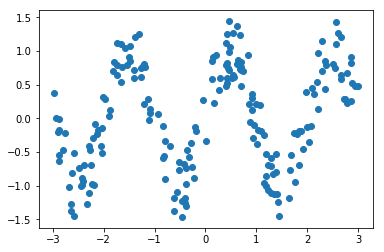

In [45]:
from sklearn.kernel_ridge import KernelRidge
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
X = np.random.uniform(-3, 3, 200)
y = np.sin(np.pi * X) + np.random.uniform(-0.5, 0.5, 200)
plt.scatter(X, y)

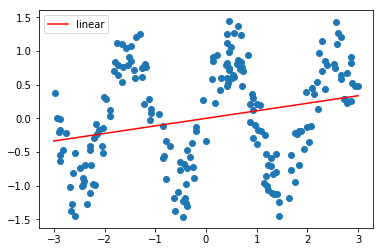

In [68]:
rgr = KernelRidge(alpha = 1, kernel = "linear")
rgr.fit(X.reshape(-1, 1), y)
interval = np.linspace(-3, 3, 101)
prediction_curve = rgr.predict(interval.reshape(-1, 1))

plt.scatter(X, y)
plt.plot(interval, prediction_curve, 'r', label="linear")
plt.legend()

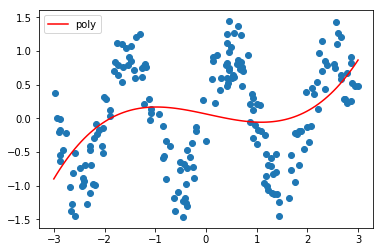

In [71]:
rgr = KernelRidge(alpha = 1, kernel = "poly", degree = 3)
rgr.fit(X.reshape(-1, 1), y)
interval = np.linspace(-3, 3, 101)
prediction_curve = rgr.predict(interval.reshape(-1, 1))

plt.scatter(X, y)
plt.plot(interval, prediction_curve, 'r', label="poly")
plt.legend()

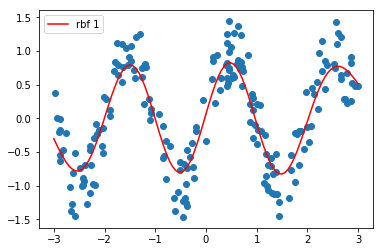

In [59]:
rgr = KernelRidge(alpha = 1, kernel = "rbf", gamma = 1)
rgr.fit(X.reshape(-1, 1), y)
interval = np.linspace(-3, 3, 101)
prediction_curve = rgr.predict(interval.reshape(-1, 1))

plt.scatter(X, y)
plt.plot(interval, prediction_curve, 'r', label="rbf 1")
plt.legend()

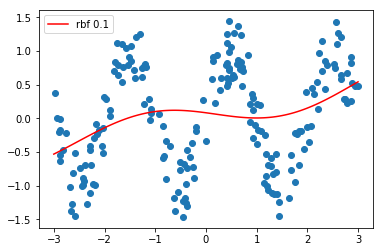

In [84]:
rgr = KernelRidge(alpha = 1, kernel = "rbf", gamma = 0.1)
rgr.fit(X.reshape(-1, 1), y)
interval = np.linspace(-3, 3, 101)
prediction_curve = rgr.predict(interval.reshape(-1, 1))

plt.scatter(X, y)
plt.plot(interval, prediction_curve, 'r', label="rbf 0.1")
plt.legend()

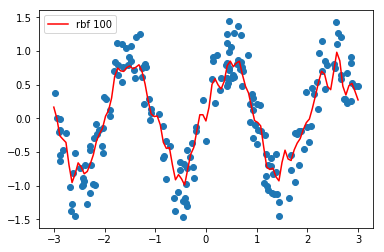

In [64]:
rgr = KernelRidge(alpha = 1, kernel = "rbf", gamma = 100)
rgr.fit(X.reshape(-1, 1), y)
interval = np.linspace(-3, 3, 101)
prediction_curve = rgr.predict(interval.reshape(-1, 1))

plt.scatter(X, y)
plt.plot(interval, prediction_curve, 'r', label="rbf 100")
plt.legend()

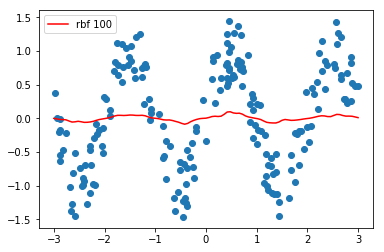

In [81]:
rgr = KernelRidge(alpha = 100, kernel = "rbf", gamma = 100)
rgr.fit(X.reshape(-1, 1), y)
interval = np.linspace(-3, 3, 101)
prediction_curve = rgr.predict(interval.reshape(-1, 1))

plt.scatter(X, y)
plt.plot(interval, prediction_curve, 'r', label="rbf 100")
plt.legend()

## 4.3 Kernel Logistic Regression

Let

$$
l(y, y') = y \log \frac1{1 + \exp(-y')} + (1-y)\log \frac1{1 + \exp(y')}
$$

and
$$
f(x) = -\mathbf w\cdot \mathbf x
$$

The logistic regression aim to solve the problems:
$$
 \min_{\mathbf w\in \mathbf R^d} \frac1N \sum_{n=1}^N {l(y, f(\mathbf x)} + \lambda \Vert w\Vert^2
$$

Now suppose the linear form of $f$ is released. We can define a kernel $K$ on $\mathbf R^d \times \mathbf R^d$. Let $\mathcal H$

Let

$$
l(y, y') = y \log \frac1{1 + \exp(-y')} + (1-y)\log \frac1{1 + \exp(y')}
$$

and
$$
f(x) = -\mathbf w\cdot \mathbf x
$$

The logistic regression aim to solve the problems:
$$
 \min_{\mathbf w\in \mathbf R^d} \frac1N \sum_{n=1}^N l(y, f(\mathbf x)) + \lambda \Vert w\Vert^2
$$

Now suppose the linear form of $f$ is released. We can define a kernel $K$ on $\mathbf R^d \times \mathbf R^d$. Let $\mathcal H$ be the KRHS associated to $K$. The problem becomes
$$
\hat f = \arg\min_{f\in \mathcal H}\frac1N \sum_{n=1}^N \left( y_n \log(1+\exp(-f(\mathbf x_n))) + (1-y_n) \log(1 + \exp(f(\mathbf x_n))) \right) + \lambda \Vert f\Vert_{\mathcal H}^2
$$

By the representer theorem, the solution can be represented as
$$
\hat f(\mathbf x) =\sum_{n=1}^N \alpha_i K(\mathbf x_n, \mathbf x)
$$

We have
$$
\left( \hat f(\mathbf x_1), \ldots, f(\mathbf x_N)\right)^t = \mathbf K \alpha
$$

and
$$
\Vert \hat f \Vert_\mathcal H^2 = \alpha^t \mathbf K \alpha
$$

To find $\alpha$, we need to solve
$$
\min_{\alpha\in\mathbf R^n} \frac1N \sum_{n=1}^N (y_n \log(1+\exp (-[\mathbf K \alpha]_n)) + (1-y_n) \log(1+\exp ([\mathbf K \alpha]_n)) ) + \lambda \alpha^t \mathbf K \alpha
$$

This can, again, be solved by approximative methods (first, second derivative)

## 4.4 Kernel SVM (DSC101 - Amphi 9)

# 5. Applications in Unsupervised Learning

## 5.1 Kernel K-Means

Given data points $\mathbf x_1, \ldots, \mathbf x_N$ in $\mathbf R^d$. The algorithm aims to find $\mu_1, \ldots, \mu_k \in \mathbf R^d$ s.t.
$$
\min_{\mu_j \in \mathbf R^d, j = 1, \ldots, k; s_n \in \{1, \ldots, k\}, n = 1,\ldots, N} \sum_{n=1}^N \Vert \mathbf x_n -\mu_{s_n}\Vert_2^2
$$

Suppose we have a mapping $\phi$ sending $\mathcal X$ to the RKHS $\mathcal H$, we can solve the following problem instead:
$$
\min_{\mu_j \in \mathcal H, j = 1, \ldots, k; s_n \in \{1, \ldots, k\}, n = 1,\ldots, N} \sum_{n=1}^N \Vert \phi(\mathbf x_n) -\mu_{s_n}\Vert_2^2
$$

Lloyd's algorithm can be transformed:

<ol>
<li>Initialize the centroid by choosing $K$ points randomly or by K-Means++ 
<li>For each $\mathbf x_n$, assign it to its closest centroid, i.e, find $j$ that solves the problem
$$
\arg\min_{j} \Vert \mathbf x_n - \mu_j \Vert_{\mathcal H}^2
$$
 then assign $\mathbf x_n$ to $C_j$.
<li>Update the centroid:
$$
\mu_j = \frac1{|C_j|}\sum_{i\in C_j} \phi(\mathbf x_i)
$$
<li>If the algorithm converges, stop, otherwise repeat step 2 and 3.
</ol>

In term of kernel, the minimization problem can be reformulated as
$$
\min_{\mu_j \in \mathcal H, j = 1, \ldots, k; s_n \in \{1, \ldots, k\}, n = 1,\ldots, N} \sum_{n=1}^N \left[ K(\mathbf x_n, \mathbf x_n) - \frac2{|C_{s_n}|}\sum_{m \in C_{s_n}} K(\mathbf x_n, \mathbf x_m) + \frac1{|C_{s_n}|^2}\sum_{m \in C_{s_n}}\sum_{p \in C_{s_n}} K(\mathbf x_m, \mathbf x_p)\right]
$$

Note that
$$
\sum_{n=1}^N \frac1{|C_{s_n}|^2}\sum_{m \in C_{s_n}}\sum_{p \in C_{s_n}} K(\mathbf x_m, \mathbf x_p) = \sum_{k=1}^K \frac1{|C_k|}\sum_{n \in C_k}\sum_{m \in C_k}K(\mathbf x_n, \mathbf x_m)
$$

and

$$
\sum_{n=1}^N \frac2{|C_{s_n}|}\sum_{m \in C_{s_n}} K(\mathbf x_n, \mathbf x_m) = \sum_{k=1}^K \frac2{|C_k|}\sum_{n \in C_k}\sum_{m \in C_k}K(\mathbf x_n, \mathbf x_m)
$$



Hence, the problem becomes
$$
\min_{s_n \in \{1, \ldots, K\}, n = 1, \ldots, N} \sum_{k=1}^K \frac1{|C_k|} \sum_{n\in C_k}\sum_{m \in C_k}K(\mathbf x_i, \mathbf x_j)
$$

To solve this problem, there are some strategies. One is to use Lloyd's algorithm again. 

This time, we randomly cluster the $N$ points to $K$ clusters for step 1. Then, step 2 and 3 can be reformulated as follows:

**Step 2 and 3-kernel**

For each $\mathbf x_n$, find $j$ that solves the problem
$$
\arg\min_j K(\mathbf x_n, \mathbf x_n) - \frac2{|C_j|} \sum_{n\in C_j} K(\mathbf x_n, \mathbf x) + \frac1{|C_j|^2}\sum_{n\in C_j} \sum_{m \in C_j} K(\mathbf x_n, \mathbf x_m)
$$

Then we repeat this step until convergence.

## 5.2 Spectral Clustering

The objective to minimize is the same as in the previous subsection
$$
\min_{s_n \in \{1, \ldots, K\}, n = 1, \ldots, N} \sum_{k=1}^K \frac1{|C_k|} \sum_{n\in C_k}\sum_{m \in C_k}K(\mathbf x_i, \mathbf x_j)
$$

We introduce the set of binary matrices $N \times K$
$$
\mathbf A
$$
having rows sum to one. $\mathbf A_{ij}=1$ represents that data of row $i$ is of cluster $k$. Let $\mathbf D$ be the rescaling matrix in $K \times K$ with diagonal entries $\mathbf D_{jj}$ equal to

$$
\left( \sum_{i=1}^n [\mathbf A]_{ij}\right)^{-1}
$$

The problem will be rewritten as
$$
\max_{\mathbf A, \mathbf D}\left[ \mathrm{trace} (\mathbf D^{1/2}\mathbf A^t \mathbf K \mathbf A \mathbf D^{1/2})\right]
$$

The constraint on $\mathbf A, \mathbf D$ is equivalent to $\mathbf D^{1/2} \mathbf A^t \mathbf A \mathbf D^{1/2} = \mathbf I$. Put $\mathbf Z = \mathbf A \mathbf D^{1/2}$, the problem becomes;

$$
\max_{\mathbf Z \in \mathbf R^{n \times k}} \mathrm{trace} (\mathbf Z^t \mathbf K \mathbf Z)
$$

s.t.
$$
\mathbf Z^t \mathbf Z = \mathbf I
$$

## 5.3 Kernel Principal Component Analysis

### 5.3.1 Remind about Principal Component Analysis

Let $\mathcal S = \{ \mathbf x_1, \ldots, \mathbf x_N\} \subset \mathbf R^d$. When $d$ large, we want to find a way to observe efficiently the data set. The **Principal Component Analysis** aims to extract subspace of $\mathbf R^d$ of low-dimension by selecting orthogonal directions that capture the maximum variance.

Assume that the data are centered, i.e., 
$$
\frac1n \sum_{n=1}^N \mathbf x_n = 0
$$

The orthogonal projection onto a direction $\mathbf w \in \mathbf R^d$ is defined by:
$$
h_{\mathbf w} = \frac{\mathbf x\cdot \mathbf w}{\Vert \mathbf w \Vert}
$$

The **empirical variance** captured by $h_{\mathbf w}$ (or on direction $\mathbf w$) is

$$
\hat{Var}(h_{\mathbf w}) = \frac1N \sum_{n=1}^N h_{\mathbf w}(\mathbf x_n)^2 = \frac1N \sum_{n=1}^N \frac{(\mathbf x_n \cdot \mathbf w)^2}{\Vert \mathbf w\Vert^2}
$$

The $i$-th principal direction $\mathbf w_i$ ($i=1, \ldots, d$) is defined by
$$
\mathbf w_i = \mathrm{arg max}_{\mathbf w\perp \mathbf w_1, \ldots, \mathbf w_{i-1}, \Vert \mathbf w \Vert = 1} \hat{Var}(h_\mathbf w)
$$


### 5.3.2 Solution to PCA

Let $\mathbf X$ be the $N\times d$ matrix whose rows are the vector $\mathbf x_1^t, \ldots, \mathbf x_N^t$. Then 

$$
\hat{Var} (h_{\mathbf w}) = \frac1N \frac{\mathbf w^t \mathbf X^t \mathbf X \mathbf w}{\mathbf w^t \mathbf w}
$$

So the problem becomes:
$$
\mathrm{argmax}_{\mathbf w\perp \mathbf w_1, \ldots, \mathbf w_{i-1}, \Vert \mathbf \Vert = 1} \mathbf w^t \mathbf X^t \mathbf X \mathbf w
$$

The solution of this problem is the successive unit eigenvectors, sorted by decreasing eigenvalues.

### 5.3.3 Kernel PCA

Let $K$ be some p.d. kernel on $\mathcal R^d$ and $\mathcal H$ its RKHS, $\phi$ is the mapping associating each element $\mathbf x$ to $K_x$ in $\mathcal H$. 

The hypothesis that data is centered can be reformulated as
$$
\frac1N \sum_n \phi(\mathbf x_n) = 0
$$

The orthogonal projection on a direction $f \in \mathcal H$ is the function $h_f$ defined by
$$
h_f(\mathbf x)= \frac{\langle \phi(x), f \rangle_\mathcal H}{\Vert f \Vert_\mathcal H} 
$$

The empirical variance captured by $h_f$ on the feature space is now
$$
\hat{Var}(h_f) = \frac1N \sum_{n=1}^N \frac{\langle \phi(x), f\rangle_\mathcal H^2}{\Vert f \Vert_\mathcal H^2 } = \frac1N \sum_{n=1}^N \frac{f(\mathbf x_i)^2}{\Vert f \Vert_\mathcal H^2 }
$$

Hence, the PCA optimization problem can be rewritten in kernel case:
$$
\mathrm{argmax}_{f\perp f_1, \ldots, f_{i-1}} \sum_{n=1}^N f(\mathbf x_n)^2
$$
s.t.
$$
\Vert f \Vert_\mathcal H = 1
$$

**Proposition 5.1**

*Kernel PCA with linear kernel is the standard PCA.*

### 5.3.4 Dual Reprsentation of Kernel PCA

Kernel PCA solves, for $i=1, \ldots, d$, 
$$
f_i = \mathrm{argmax}_{f\perp f_1, \ldots, f_{i-1}} \sum_{n=1}^N f(x_n)^2
$$
s.t.
$$
\Vert  f\Vert_\mathcal H = 1
$$

By representer theorem, for $i = 1, \ldots, d$, we have
$$
\forall \mathbf x \in \mathbf X, f_i(\mathbf x) = \sum_{n=1}^N \alpha_{i,n} K(\mathbf x_n, \mathbf x)
$$

for some $\mathbf \alpha_i = (\alpha_{i,1}, \ldots, \alpha_{i,N})^t \in \mathbf R^N$.

So
$$
\Vert f_i \vert_{\mathcal H} = \sum_{n,m=1}^N \alpha_{i,n}\alpha_{i,m}K(\mathbf x_n, \mathbf x_m) = \alpha_i^t \mathbf K \alpha_i
$$

and
$$
\sum_{n=1}^N f_i(\mathbf x_n)^2 = \alpha_i^t\mathbf K^2 \alpha_i 
$$

and
$$
\langle f_i, f_j \rangle_\mathbf H = \alpha_i^t \mathbf K \alpha_j
$$

The (dual) problem becomes:
$$
\alpha_i = \mathrm{argmax}_{\alpha\in\mathbf R^n} \alpha^t \mathbf K^2 \alpha
$$

s.t.
$$
\alpha_i^t \mathbf K \alpha_j = 0
$$
for $j =1, \ldots, i-1$

and
$$
\alpha_i^t \mathbf K \alpha_i = 1
$$

### 5.3.5 Solution to Kernel PCA

The solution of the problem can be found by:
- Centering the Gram matrix (see section 2)
- Conpute the first eigenvectors and eigenvalues ($\mathbf u_i$, $\Delta_i$)
- Norrmalize the eigenvectors $\mathbf \alpha_u = \mathbf u_i/\sqrt{\Delta_i}$
- The projection of the points on the $i-$th eigenvector is given by $\mathbf K\alpha_i$

### 5.3.6 Implementation

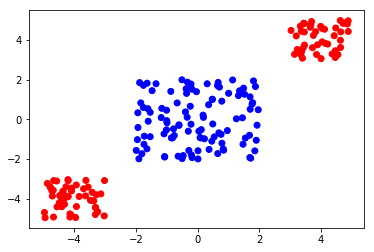

In [78]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
y = np.random.binomial(1, 0.5, 200)
left_right_random = np.random.binomial(1, 0.5, 200)

X1 = np.random.uniform(-2, 2, 200) * y + ( np.random.uniform(-5, -3, 200)*left_right_random + np.random.uniform(3, 5, 200)*(1-left_right_random)) * (1 - y)
X2 = np.random.uniform(-2, 2, 200) * y + ( np.random.uniform(-5, -3, 200)*left_right_random + np.random.uniform(3, 5, 200)*(1-left_right_random)) * (1 - y)
epsilon = np.random.uniform(-0.1, 0.1, 200)

COLORS = {0: "red", 1: "blue"}

plt.scatter(X1, X2, color=[COLORS[j] for j in y])

In [79]:
X = np.array([X1, X2]).T

In [80]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X, y)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [81]:
pca.components_

array([[ 0.70454618,  0.70965815],
       [ 0.70965815, -0.70454618]])

In [82]:
pca.explained_variance_

array([16.25088168,  0.86429592])

In [83]:
pca.explained_variance_ratio_

array([0.9495012, 0.0504988])

In [84]:
pca.singular_values_

array([56.86761341, 13.11468212])

In [85]:
pca.mean_

array([-0.18030405, -0.11740397])

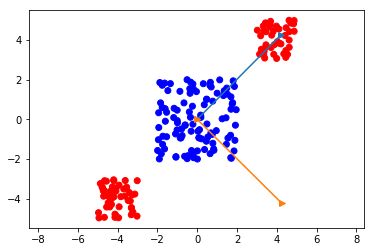

In [87]:
plt.axis('equal')
plt.scatter(X1, X2, color=[COLORS[j] for j in y])
for direction in pca.components_:
    plt.plot([0, direction[0] * 6], [0, direction[1] * 6], "->")

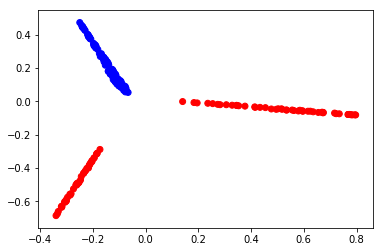

In [88]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel='rbf', fit_inverse_transform = True, gamma = 1)
X_transformed = kpca.fit_transform(X, y)
plt.scatter(X_transformed[:, 0], X_transformed[:,1], color = [COLORS[j] for j in y])

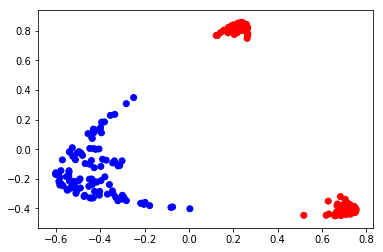

In [93]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel='rbf', fit_inverse_transform = True, gamma = 0.1)
X_transformed = kpca.fit_transform(X, y)
plt.scatter(X_transformed[:, 0], X_transformed[:,1], color = [COLORS[j] for j in y])

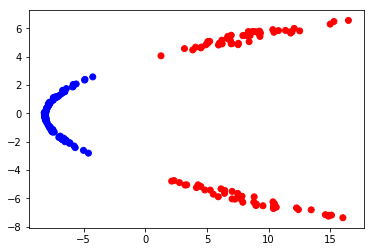

In [127]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel='poly', degree=2, coef0 = 1)
X_transformed = kpca.fit_transform(X, y)
plt.scatter(X_transformed[:, 0], X_transformed[:,1], color = [COLORS[j] for j in y])